# Importing libraries 

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
import spotipy #api
from spotipy.oauth2 import SpotifyClientCredentials #login credentials

# Authenticating credentials

In [212]:
#credentials
cid = 'x'
cids = 'x'

#authentication
credentials = SpotifyClientCredentials(client_id= cid, client_secret=cids)
sp = spotipy.Spotify(client_credentials_manager = credentials)

# Functions to extract songs from playlists

In [213]:
#necessary functions 

#extract the URI (ID) from a playlist link
def uri_from_playlist(link):
    uri = link.split('list/')[1].split('?')[0]
    return uri

#extract URI from a song
def uri_from_song(link):
    uri = link.split('track/')[1].split('?')[0]
    #format uri in form 'spotify:track:uri'
    uri_formatted = 'spotify:track:'+uri
    return uri_formatted

#extract track URIs from the given playlist URI (returns list with URIs)
#this is an upgrade of the original track_output_from_playlist to return all songs of a dataset not just 100
def track_output_from_playlist_100(uri_plist):
    results = sp.playlist_tracks(uri_plist)
    tracks = results["items"] #items removes my data to make dataset
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

#extract track URIs from the given playlist URI (returns list with URIs)
# def track_output_from_playlist(uri_plist):
#     track_output = [x for x in sp.playlist_tracks(uri_plist)["items"]] #items removes my data to make dataset
#     return track_output

### Run these to test the functions written above

In [5]:
#playlist and song to test functions with 
#maisi is a playlist with 169 songs 
#slide is a song 

#maisi = 'https://open.spotify.com/playlist/1gNWLVtbKb3aeiws4kUhep?si=9cb4830584094c91'
#slide = 'https://open.spotify.com/track/6gpcs5eMhJwax4mIfKDYQk?si=427b2caf0860491b'

In [6]:
#testing functions
# playlist = uri_from_playlist(maisi) 
# print(playlist)
# song = uri_from_song(slide)
# print(song)
# tracklist = track_output_from_playlist_100(uri_from_playlist(maisi))
# print(tracklist)

# Analysis of playlist 

In [185]:
#Enter playlist into the variable below for analysis 
link = 'https://open.spotify.com/playlist/3fIPLxhjKcmgoVuQo6d7kN?si=bcdafb7303ed4f50'
tracklist = track_output_from_playlist_100(uri_from_playlist(link))

In [186]:
#to display the name of each track, uncomment the print statement
track_uris = []
track_names = []
for idx,tracks in enumerate(tracklist):
    #print(idx,'-', tracks['track']['name'],'\n')
    track_uris.append(tracks['track']['uri'])
    track_names.append(tracks['track']['name'])

In [191]:
sp.audio_features(track_uris[0])

[{'danceability': 0.866,
  'energy': 0.576,
  'key': 3,
  'loudness': -8.528,
  'mode': 0,
  'speechiness': 0.361,
  'acousticness': 0.411,
  'instrumentalness': 0,
  'liveness': 0.0727,
  'valence': 0.397,
  'tempo': 93.535,
  'type': 'audio_features',
  'id': '340sK9p2KG5MpbGIyBzfbi',
  'uri': 'spotify:track:340sK9p2KG5MpbGIyBzfbi',
  'track_href': 'https://api.spotify.com/v1/tracks/340sK9p2KG5MpbGIyBzfbi',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/340sK9p2KG5MpbGIyBzfbi',
  'duration_ms': 209626,
  'time_signature': 4}]

In [187]:
#list of all features given in the audio_features method
#to view the type of output, uncomment the print type statement
for key,val in sp.audio_features(tracklist[0]['track']['uri'])[0].items():
    print(key)
    #print(type(val))

danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
type
id
uri
track_href
analysis_url
duration_ms
time_signature


In [165]:
#we are only interested in numerical features associated with each song
numeric_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']        

In [166]:
#this creates the dataframe that holds all of the feature data
features_df = pd.DataFrame()

#create dataframe with songs and their numerical features for plotting
for idx,uri in enumerate(track_uris):
    feat_list = []
    for vals in numeric_features:
        value = sp.audio_features(uri)[0][vals]
        feat_list.append(value)
    feat_s = pd.Series(feat_list).T
    #print(feat_s.shape)
    features_df = pd.concat([features_df, feat_s], axis=1)
    if idx % 20 == 0 and idx != 0:
        print('Data from ', idx, 'songs have been parsed')
print("All data has been added to the feature matrix")

All data has been added to the feature matrix


In [167]:
features_df.index = numeric_features
features_df.columns = track_names
features_df = features_df.T

In [168]:
#adding a popularity score
pop_score = []
for t in range(0, len(tracklist)):
    pop_score.append(tracklist[t]['track']['popularity'])
pop_score = pd.DataFrame(pop_score, columns=['popularity'], index = track_names)
features_df = pd.concat([features_df, pop_score], axis=1)

In [169]:
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
Winter Time Grind (feat. Babyface Ray),0.866,0.576,3.0,-8.528,0.0,0.3610,0.4110,0.000000,0.0727,0.397,93.535,209626.0,4.0,41
Slide (feat. Frank Ocean & Migos),0.736,0.795,1.0,-3.299,0.0,0.0545,0.4980,0.000001,0.2540,0.511,104.066,230813.0,4.0,73
Baby Pluto,0.772,0.634,10.0,-6.101,0.0,0.2120,0.1350,0.000000,0.4320,0.671,160.052,210261.0,4.0,68
44 BullDog,0.800,0.564,8.0,-5.817,1.0,0.4000,0.0287,0.000002,0.1120,0.318,139.989,150857.0,4.0,64
can't leave without it,0.872,0.591,6.0,-6.952,0.0,0.3590,0.1110,0.000000,0.1440,0.696,131.982,205352.0,4.0,72


Text(0.5, 1.0, 'Time Signature')

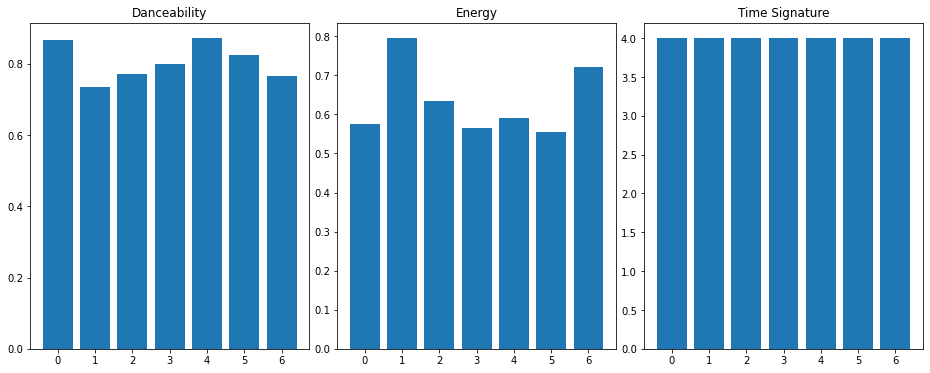

In [172]:
#Danceability, Energy, Time Signature
fig,ax = plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(wspace=0.1)

ax[0].bar(range(0,len(features_df.index)), features_df.danceability)
ax[0].set_title('Danceability')
ax[1].bar(range(0,len(features_df.index)), features_df.energy)
ax[1].set_title('Energy')
ax[2].bar(range(0,len(features_df.index)), features_df.time_signature)
ax[2].set_title('Time Signature')

Text(0.5, 1.0, 'Speechiness')

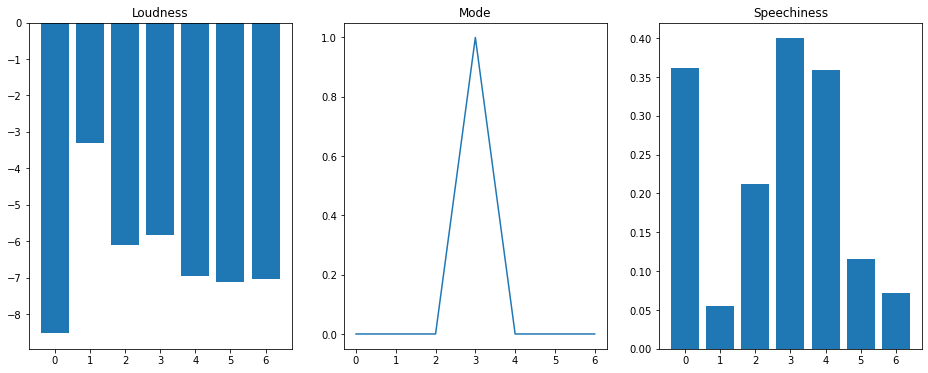

In [173]:
#loudness, mode, speechiness
fig,ax = plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(wspace=0.2)

ax[0].bar(range(0,len(features_df.index)), features_df.loudness)
ax[0].set_title('Loudness')
ax[1].plot(range(0,len(features_df.index)), features_df['mode'])
ax[1].set_title('Mode')
ax[2].bar(range(0,len(features_df.index)), features_df.speechiness)
ax[2].set_title('Speechiness')

Text(0.5, 1.0, 'Liveness')

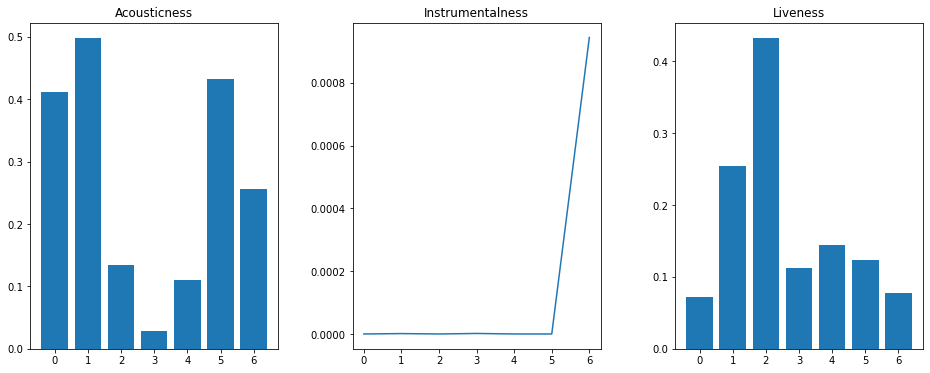

In [174]:
#acousticness, instrumentalness, liveness
fig,ax = plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(wspace=0.3)

ax[0].bar(range(0,len(features_df.index)), features_df.acousticness)
ax[0].set_title('Acousticness')
ax[1].plot(range(0,len(features_df.index)), features_df['instrumentalness'])
ax[1].set_title('Instrumentalness')
ax[2].bar(range(0,len(features_df.index)), features_df.liveness)
ax[2].set_title('Liveness')

Text(0.5, 1.0, 'Duration')

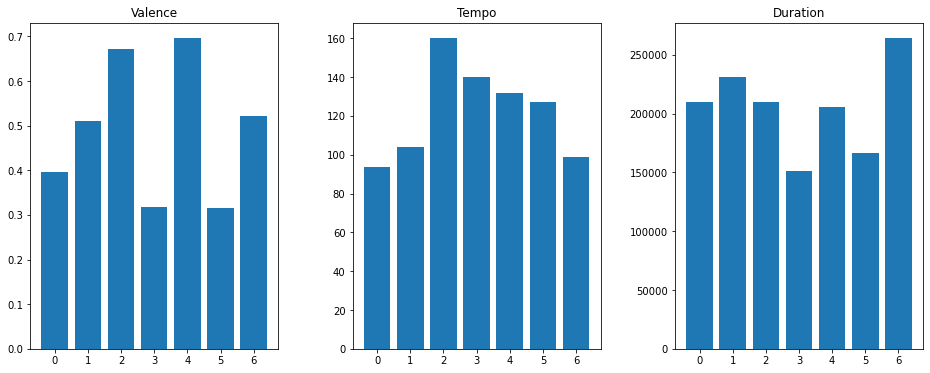

In [175]:
#valence, tempo, duration
fig,ax = plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(wspace=0.3)

ax[0].bar(range(0,len(features_df.index)), features_df.valence)
ax[0].set_title('Valence')
ax[1].bar(range(0,len(features_df.index)), features_df['tempo'])
ax[1].set_title('Tempo')
ax[2].bar(range(0,len(features_df.index)), features_df.duration_ms)
ax[2].set_title('Duration')

Text(0.5, 1.0, 'Popularity')

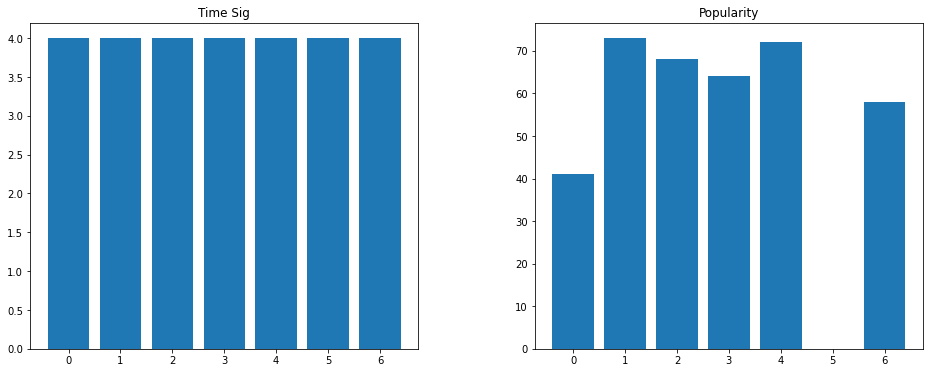

In [176]:
#time_sig, popularity
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(wspace=0.3)

ax[0].bar(range(0,len(features_df.index)), features_df.time_signature)
ax[0].set_title('Time Sig')
ax[1].bar(range(0,len(features_df.index)), features_df['popularity'])
ax[1].set_title('Popularity')

In [170]:
#normalize dataset 
features_norm=(features_df-features_df.min())/(features_df.max()-features_df.min())

In [171]:
features_norm.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
Winter Time Grind (feat. Babyface Ray),0.955882,0.091286,0.222222,0.000000,0.0,0.887120,0.814618,0.000000,0.000000,0.213158,0.000000,0.518314,NaN,0.561644
Slide (feat. Frank Ocean & Migos),0.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.001282,0.504592,0.513158,0.158320,0.705173,NaN,1.000000
Baby Pluto,0.264706,0.331950,1.000000,0.464142,0.0,0.455861,0.226508,0.000000,1.000000,0.934211,1.000000,0.523914,NaN,0.931507
44 BullDog,0.470588,0.041494,0.777778,0.518455,1.0,1.000000,0.000000,0.001748,0.109379,0.005263,0.698378,0.000000,NaN,0.876712
can't leave without it,1.000000,0.153527,0.555556,0.301396,0.0,0.881331,0.175368,0.000000,0.198441,1.000000,0.578003,0.480619,NaN,0.986301


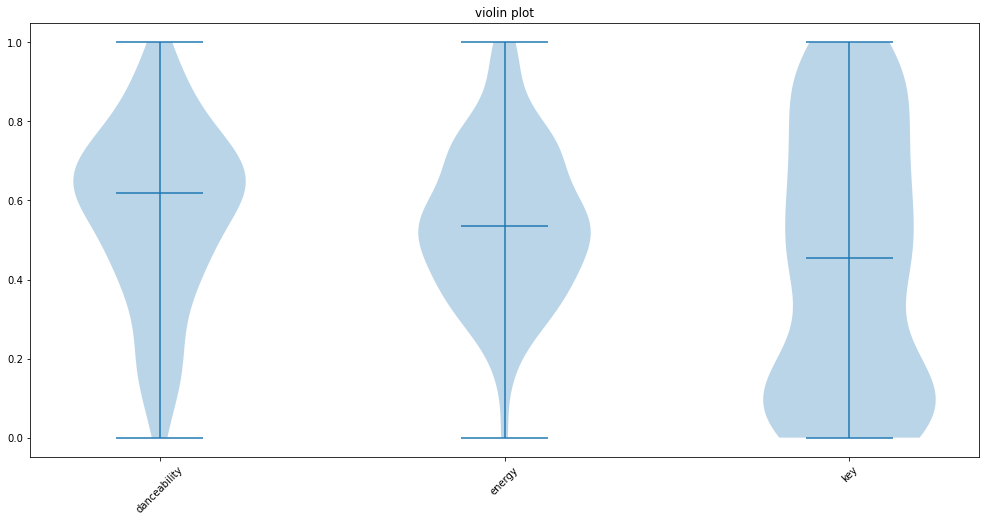

In [53]:
#show violin plot of all of the features
# fig, ax = plt.subplots()
# fig.set_size_inches(17, 8)
# ax.violinplot(features_norm.iloc[:,:], showmedians=True)
# ax.set_title('violin plot')
# ax.set_xticks([x for x in range(0,len(features_norm.columns))])
# ax.set_xticklabels(features_norm.columns)
# plt.xticks(rotation=45)
# plt.show()

#show violin plots of certain number of features
num_features = 3
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
ax.violinplot(features_norm.iloc[:,0:num_features], showmedians=True)
ax.set_title('violin plot')
ax.set_xticks([x for x in range(1,num_features+1)])
ax.set_xticklabels(features_norm.columns[0:num_features])
plt.xticks(rotation=45)
plt.show()

# Saving the required playlist tracklists for clustering

The goal of this project is tri fold

1. Compare my artist playlists with spotify's artists playlists and see if they cluster the same
2. Analyze the different mood playlists that I have 
3. Create a recommendation system based on the custom moods playlists that exist

In [215]:
#loading artist_playlist csv which contains name and playlist_link
artist_playlists = pd.read_csv('spotify_artist_playlists.csv', header = None)
artist_playlists.columns = ['artist_name', 'playlist_link']
artist_playlists.head(2)

,artist_name,playlist_link
0,suicideboys,https://open.spotify.com/playlist/37i9dQZF1DZ0...
1,21 savage,https://open.spotify.com/playlist/37i9dQZF1DWY...


In [216]:
ap_uris = []
for link in artist_playlists.playlist_link:
    uri = uri_from_playlist(link)
    ap_uris.append(uri)

artist_playlists['uri'] = ap_uris
artist_playlists.drop('playlist_link',axis=1,inplace=True)
artist_playlists.head(10)

,artist_name,uri
0,suicideboys,37i9dQZF1DZ06evO15CHq8
1,21 savage,37i9dQZF1DWYojpWKpDMGi
2,asap mob,37i9dQZF1DWXmxXDRgAKVq
3,aaron may,37i9dQZF1DZ06evO1oHoLT
4,brockhampton,37i9dQZF1DZ06evO0Tiwvu
5,carti nudy pierre,37i9dQZF1DZ06evO3CRVnO
6,daft punk,37i9dQZF1DWZAkrucRF6Gq
7,drake,37i9dQZF1DX7QOv5kjbU68
8,freddie gibbs,37i9dQZF1DZ06evO0vFpVC
9,frank ocean,37i9dQZF1DXdyjMX5o2vCq


In [220]:
#dataframe storing the mean of each feature for each artist 
artist_data = pd.DataFrame()
#dataframe to hold features during loop
#features_df = pd.DataFrame()

#step1 - pull each song from the playlist and save it into a tracklist
#step2 - create dataframe from tracklist and take average of columns
#step3 - add the mean columns along with artist name into artist_data

for idxx,uril in enumerate(artist_playlists['uri']):
    #pulling songs from each playlist into tracklist
    tracklist = track_output_from_playlist_100(uril)
    
    #to display the name of each track, uncomment the print statement
    track_uris = []
    track_names = []
    for tracks in tracklist:
        #print(idx,'-', tracks['track']['name'],'\n')
        track_uris.append(tracks['track']['uri'])
        track_names.append(tracks['track']['name'])

    #saving popularity score for each song
    pop_score=[]
    for t in range(0, len(tracklist)):
        pop_score.append(tracklist[t]['track']['popularity'])
    pop_score = pd.DataFrame(pop_score, columns=['popularity'])
    
    features_df = pd.DataFrame()
    
    print('Starting track parsing process for', artist_playlists.iloc[idxx,0])
    for idx,uri in enumerate(track_uris):
        feat_list = []
        for vals in numeric_features:
            value = sp.audio_features(uri)[0][vals]
            feat_list.append(value)
        feat_s = pd.Series(feat_list).T
        #print(feat_s.shape)
        features_df = pd.concat([features_df, feat_s], axis=1)
        if idx % 10 == 0 and idx != 0:
            print('Data from ', idx, 'songs have been parsed')
    
    print("All data from", artist_playlists.iloc[idxx,0], "has been added to the feature matrix")
    
    #after creation of features_df for the songs in playlist, format it and take means
    features_df.index = numeric_features
    #features_df.columns = track_names
    features_df = features_df.T.reset_index(drop=True)
    print(features_df.head(2))
    print(pop_score.head(2))
    features_df = pd.concat([features_df, pop_score], axis=1, ignore_index=True)
    means = pd.DataFrame(features_df.mean()).T.reset_index(drop=True)
    artist_data = pd.concat([artist_data,means])
    print("Added to artist_data. Running loop again...\n")

Starting track parsing process for suicideboys
Data from  10 songs have been parsed
Data from  20 songs have been parsed
Data from  30 songs have been parsed
Data from  40 songs have been parsed
All data from suicideboys has been added to the feature matrix
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.792   0.511  2.0    -6.876   1.0       0.0409         0.124   
1         0.753   0.680  5.0    -7.092   0.0       0.0349         0.326   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000090     0.140    0.111  113.983     168490.0             4.0  
1          0.000041     0.423    0.192  105.977     145078.0             4.0  
   popularity
0          81
1          78
Added to artist_data. Running loop again...

Starting track parsing process for 21 savage


KeyboardInterrupt: 

In [11]:
artist_data.index = artist_playlists['artist_name']

In [12]:
#artist_data.to_csv('spotify_artist_data.csv')